# Clustering: ISOMAP

ISOMAP (Isometric Mapping) is a nonlinear dimensionality reduction technique that preserves geodesic distances (i.e., shortest path distances along a manifold) instead of Euclidean distances.  

It works in three key steps:  

Construct neighborhood graph using either $\epsilon$-radius or $k$-nearest neighbors.  

Compute shortest paths (geodesic distances) between all points on the graph.  

Apply Multidimensional Scaling (MDS) to the shortest path (geodesic) distance matrix.  

Dataset:  

| Point | Coordinates |
| ----- | ----------- |
| A     | (1, 1)      |
| B     | (2, 1)      |
| C     | (4, 3)      |
| D     | (5, 4)      |
| E     | (3, 4)      |


**Step 0: Choose Parameters**  

Let’s use:

$ k = 2$ (each point is connected to its 2 nearest neighbors).  

**Step 1: Construct Neighborhood Graph**  

Use Euclidean distances (already computed):  

|   | A   | B   | C   | D   | E   |
| - | --- | --- | --- | --- | --- |
| A | 0.0 | 1.0 | 3.6 | 5.0 | 3.6 |
| B | 1.0 | 0.0 | 2.8 | 4.2 | 3.2 |
| C | 3.6 | 2.8 | 0.0 | 1.4 | 1.4 |
| D | 5.0 | 4.2 | 1.4 | 0.0 | 2.0 |
| E | 3.6 | 3.2 | 1.4 | 2.0 | 0.0 |

Now, connect each point to its 2 nearest neighbors:  

A $\rightarrow$ B, C  
B $\rightarrow$ A, C  
C $\rightarrow$ D, E  
D $\rightarrow$ C, E  
E $\rightarrow$ C, D  

This forms a graph with edges based on local proximity.  

**Step 2: Compute Shortest Paths (Geodesic Distances)**  

To compute shortest paths in the graph we can use Dijkstra’s algorithm (or Floyd–Warshall) :  

The Dijkstra ($D$) matrix:  

|   | A   | B   | C   | D   | E   |
| - | --- | --- | --- | --- | --- |
| A | 0.0 | 1.0 | 3.6 | 5.0 | 5.0 |
| B | 1.0 | 0.0 | 2.8 | 4.2 | 4.2 |
| C | 3.6 | 2.8 | 0.0 | 1.4 | 1.4 |
| D | 5.0 | 4.2 | 1.4 | 0.0 | 2.0 |
| E | 5.0 | 4.2 | 1.4 | 2.0 | 0.0 |

$D_{ij} \approx || x_i - y_j||$  

Note: These distances are computed by summing the shortest paths through the graph, not direct Euclidean distances.  

Example:  
A $\rightarrow$ C: through B (1.0 + 2.8 = 3.8), or directly (3.6) $\rightarrow$ pick 3.6  
A $\rightarrow$ D: A $\rightarrow$ C $\rightarrow$ D = 3.6 + 1.4 = 5.0  
A $\rightarrow$ E: A $\rightarrow$ C $\rightarrow$ E = 3.6 + 1.4 = 5.0  

**Step 3: Apply MDS**  

Now that we have the geodesic (shortest-path) distance matrix, we apply classical MDS (Multidimensional Scaling) to it, to embed the points into a lower-dimensional space (typically 2D) while **preserving these geodesic distances** as best as possible.  

You can think of this as solving:

Find 2D or 1D coordinates such that $\|\ x_i - x_j \|\ \approx \text{geodesic}_\text{dist}(i,j)$  

MDS works by:  

* 1. Centering the matrix.  
* 2. Computing the eigenvalues and eigenvectors of the Gram matrix.  
* 3. Choosing the top n_components to build the new embedding.  

The result will be a 2D layout where nonlinear structure is preserved better than with PCA.  

✅ **Conclusion**: Why ISOMAP Preserves Geodesic Distances  

* The graph built on nearest neighbors respects the local geometry.
* Distances on this graph (geodesic distances) provide a good approximation of the true structure of the manifold.
* MDS applies a linear projection that preserves these geodesic distances as much as possible. 


**Appendix**.  
MDS mathematical steps & explanations:  
* 1. $D_{eucli}[i,j] = ||x_i - x_j||^2$  Euclidean matrix  
* 2. Using the $knn$ we build $D_{geo}(i,j)$ geodesic matrix with 2-nn based on euclidean matrix $D_{eucli}[i,j]$
* 3. Double centring of $D_{geo}^2$ to obtain a Gram matrix $B$
    $$B = -\dfrac{1}{2}HD^2D$$ 
    with $H = I - \dfrac{1}{n}11^T$.  
    This allows to builld a centered scalar product of type: $B_{ij} = <y_i, y_j>$
* 4. Spectral decomposition:
    $$B = V \Lambda V^T$$ 
    
    where $\Lambda$ contains the positive eigen values, and $V$ the eigen vectors.
* 5. Projection in a space of dimension $d$:  
    $$Y = V_d \Lambda_d^{1/2}$$

    This operation gives the points $Y = [y_1, \ldots, y_n] \in R^d$ that minimize:  
    $$\sum_{i<j}(||y_i - y_j|| - D_{ij})^2$$
    i.e. preserve the best the geodesic distances $D_{geo}$ according to the principal axis of variance.



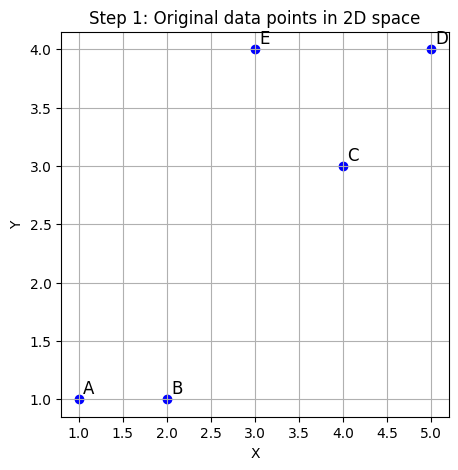

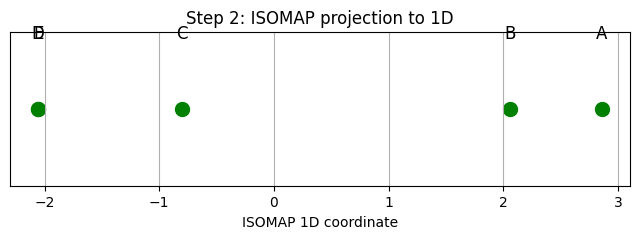

Step 3: Coordinates after ISOMAP (1D projection):
Point A: 2.8575
Point B: 2.0569
Point C: -0.8034
Point D: -2.0555
Point E: -2.0555


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap

# Step-by-step ISOMAP explanation with a small 2D dataset

# 1. Define the dataset
# Points: A(1,1), B(2,1), C(4,3), D(5,4), E(3,4)
points = np.array([
    [1, 1],  # A
    [2, 1],  # B
    [4, 3],  # C
    [5, 4],  # D
    [3, 4],  # E
])
labels_names = ['A', 'B', 'C', 'D', 'E']

# 2. Visualize the original points in 2D space
plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], color='blue')
for i, txt in enumerate(labels_names):
    plt.annotate(txt, (points[i, 0]+0.05, points[i, 1]+0.05), fontsize=12)
plt.title("Step 1: Original data points in 2D space")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

# 3. Apply ISOMAP to reduce to 1D (for illustrative purposes)
# We'll use n_neighbors=2 (number of neighbors in graph) and n_components=1 (target dimension)
n_neighbors = 2
n_components = 1
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
points_isomap = isomap.fit_transform(points)

# 4. Visualize the result in 1D
plt.figure(figsize=(8, 2))
plt.scatter(points_isomap[:, 0], np.zeros_like(points_isomap[:, 0]), color='green', s=100)
for i, txt in enumerate(labels_names):
    plt.annotate(txt, (points_isomap[i, 0], 0.05), ha='center', fontsize=12)
plt.title("Step 2: ISOMAP projection to 1D")
plt.yticks([])
plt.xlabel("ISOMAP 1D coordinate")
plt.grid(True)
plt.show()

# 5. Print the 1D coordinates of the projected points
print("Step 3: Coordinates after ISOMAP (1D projection):")
for i, name in enumerate(labels_names):
    print(f"Point {name}: {points_isomap[i, 0]:.4f}")

# --- Explanations (in English) ---
# Step 1: We define and visualize five 2D points named A to E.
# Step 2: We apply ISOMAP to project the data to 1D using a neighborhood graph with 2 neighbors per point.
#         ISOMAP preserves geodesic (graph-based) distances rather than direct Euclidean distances.
# Step 3: We plot the 1D projection to see how the intrinsic manifold structure is represented in 1D.
#         The printed output shows the new 1D coordinates of each original point.


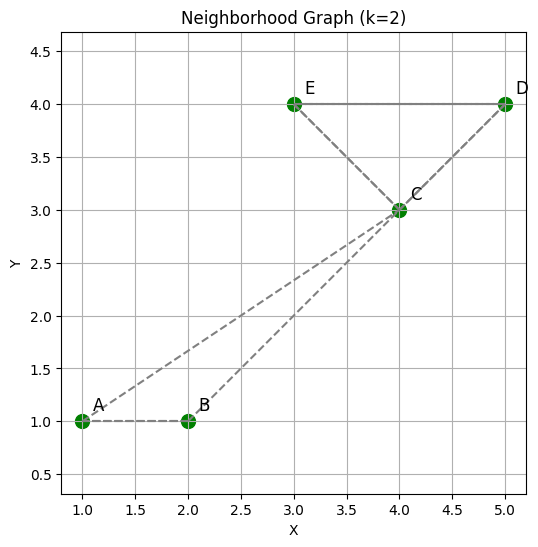

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Points 2D
points = np.array([
    [1, 1],  # A
    [2, 1],  # B
    [4, 3],  # C
    [5, 4],  # D
    [3, 4],  # E
])
labels_names = ['A', 'B', 'C', 'D', 'E']
n_neighbors = 2

# Build k-nearest neighbor graph
nbrs = NearestNeighbors(n_neighbors=n_neighbors + 1).fit(points)
distances, indices = nbrs.kneighbors(points)

# Plot points
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], s=100, color='green')
for i, txt in enumerate(labels_names):
    plt.annotate(txt, (points[i, 0]+0.1, points[i, 1]+0.1), fontsize=12)

# Draw edges to neighbors (excluding self)
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:  # skip self (first neighbor)
        plt.plot([points[i, 0], points[j, 0]],
                 [points[i, 1], points[j, 1]],
                 color='gray', linestyle='--')

plt.title("Neighborhood Graph (k=2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.axis('equal')
plt.show()


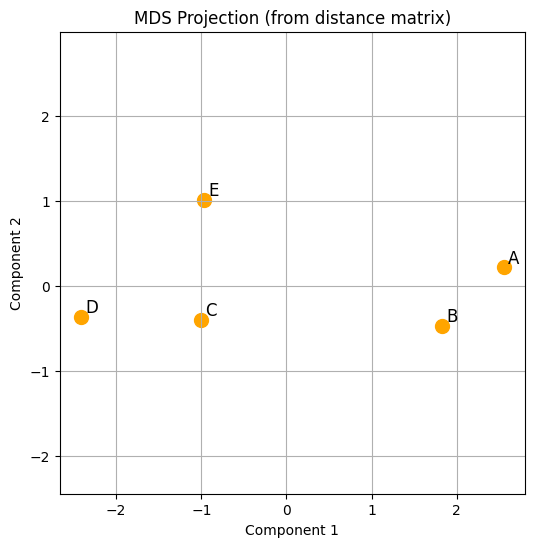

In [5]:
from scipy.spatial.distance import squareform, pdist
from scipy.linalg import eigh

# Step 1: compute pairwise distances (geodesics ≈ Euclidean here)
D = squareform(pdist(points))  # (5x5)

# Step 2: square the distance matrix
D_squared = D ** 2

# Step 3: double-centering
n = D.shape[0]
H = np.eye(n) - np.ones((n, n)) / n
B = -0.5 * H @ D_squared @ H  # (Gram matrix)

# Step 4: eigendecomposition
eigvals, eigvecs = eigh(B)

# Step 5: sort eigenvalues/vectors in descending order
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# Step 6: project to 2D (use only top 2 eigenvalues/vectors)
X_mds = eigvecs[:, :2] * np.sqrt(eigvals[:2])

# Plot result
plt.figure(figsize=(6, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], s=100, color='orange')
for i, label in enumerate(labels_names):
    plt.annotate(label, (X_mds[i, 0]+0.05, X_mds[i, 1]+0.05), fontsize=12)
plt.title("MDS Projection (from distance matrix)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.axis('equal')
plt.show()


/Users/davidtbo/Library/Mobile Documents/com~apple~CloudDocs/AI/machine_learning/unsupervised_learning/.venv/lib/python3.13/site-packages/sklearn/manifold/_isomap.py:384: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/davidtbo/Library/Mobile Documents/com~apple~CloudDocs/AI/machine_learning/unsupervised_learning/.venv/lib/python3.13/site-packages/scipy/sparse/_index.py:168: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


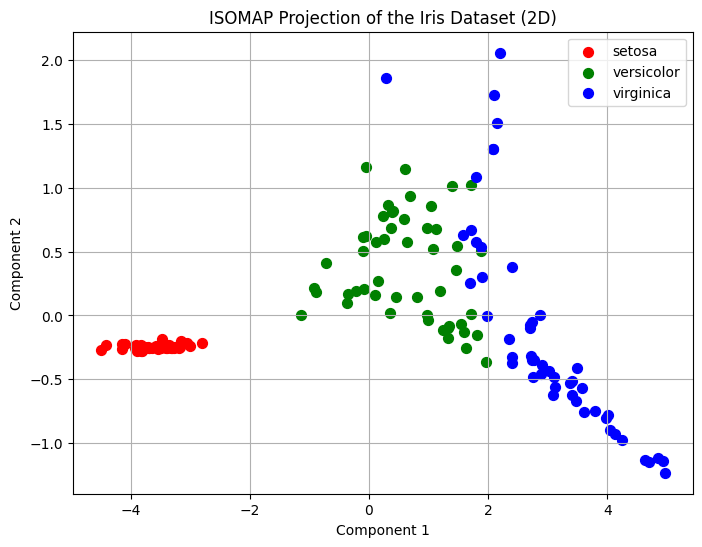

Example of transformed coordinates (first 5 points):
Point 1 (original class = setosa): [-3.30929259 -0.25231677]
Point 2 (original class = setosa): [-3.81927582 -0.27940151]
Point 3 (original class = setosa): [-3.81557525 -0.28079958]
Point 4 (original class = setosa): [-3.6428154  -0.25307219]
Point 5 (original class = setosa): [-3.39818281 -0.25363203]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import Isomap

# 1. Load the Iris dataset
iris = load_iris()
X = iris.data                # Features: 4D (sepal/petal length & width)
y = iris.target              # Labels: 0 = setosa, 1 = versicolor, 2 = virginica
target_names = iris.target_names

# 2. Apply ISOMAP to reduce to 2D
# We'll use 5 neighbors to build the graph
isomap = Isomap(n_neighbors=5, n_components=2)
X_iso = isomap.fit_transform(X)

# 3. Visualize the 2D projection
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i, target_name in enumerate(target_names):
    plt.scatter(X_iso[y == i, 0], X_iso[y == i, 1], 
                label=target_name, color=colors[i], s=50)
plt.title("ISOMAP Projection of the Iris Dataset (2D)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

# 4. Print a few transformed coordinates for inspection
print("Example of transformed coordinates (first 5 points):")
for i in range(5):
    print(f"Point {i+1} (original class = {target_names[y[i]]}): {X_iso[i]}")
